<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Target</a></span></li><li><span><a href="#Type" data-toc-modified-id="Type-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Type</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Split-data" data-toc-modified-id="Split-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Split data</a></span></li><li><span><a href="#scaling" data-toc-modified-id="scaling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>scaling</a></span></li><li><span><a href="#Data-distribution" data-toc-modified-id="Data-distribution-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data distribution</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#row-??" data-toc-modified-id="row-??-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>row ??</a></span></li></ul></div>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as no

from tqdm import tqdm
from sklearn import preprocessing
from imblearn import over_sampling

# Data

In [5]:
data = pd.read_csv('../dataset/train.csv',index_col=0)
test = pd.read_csv('../dataset/test.csv', index_col=0)
print('dataset shape: ', data.shape)
print('testset shape: ', test.shape)

dataset shape:  (200000, 201)
testset shape:  (200000, 200)


# Target

In [6]:
data.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [7]:
data.target.value_counts(normalize=True).apply(lambda x: '{0:.3%}'.format(x))

0    89.951%
1    10.049%
Name: target, dtype: object

# Type

In [8]:
type_list = list()
for i in range(1,data.shape[1]):
    type_list.append(data.iloc[:,i].dtype)
np.unique(type_list)

array([dtype('float64')], dtype=object)

# Correlation

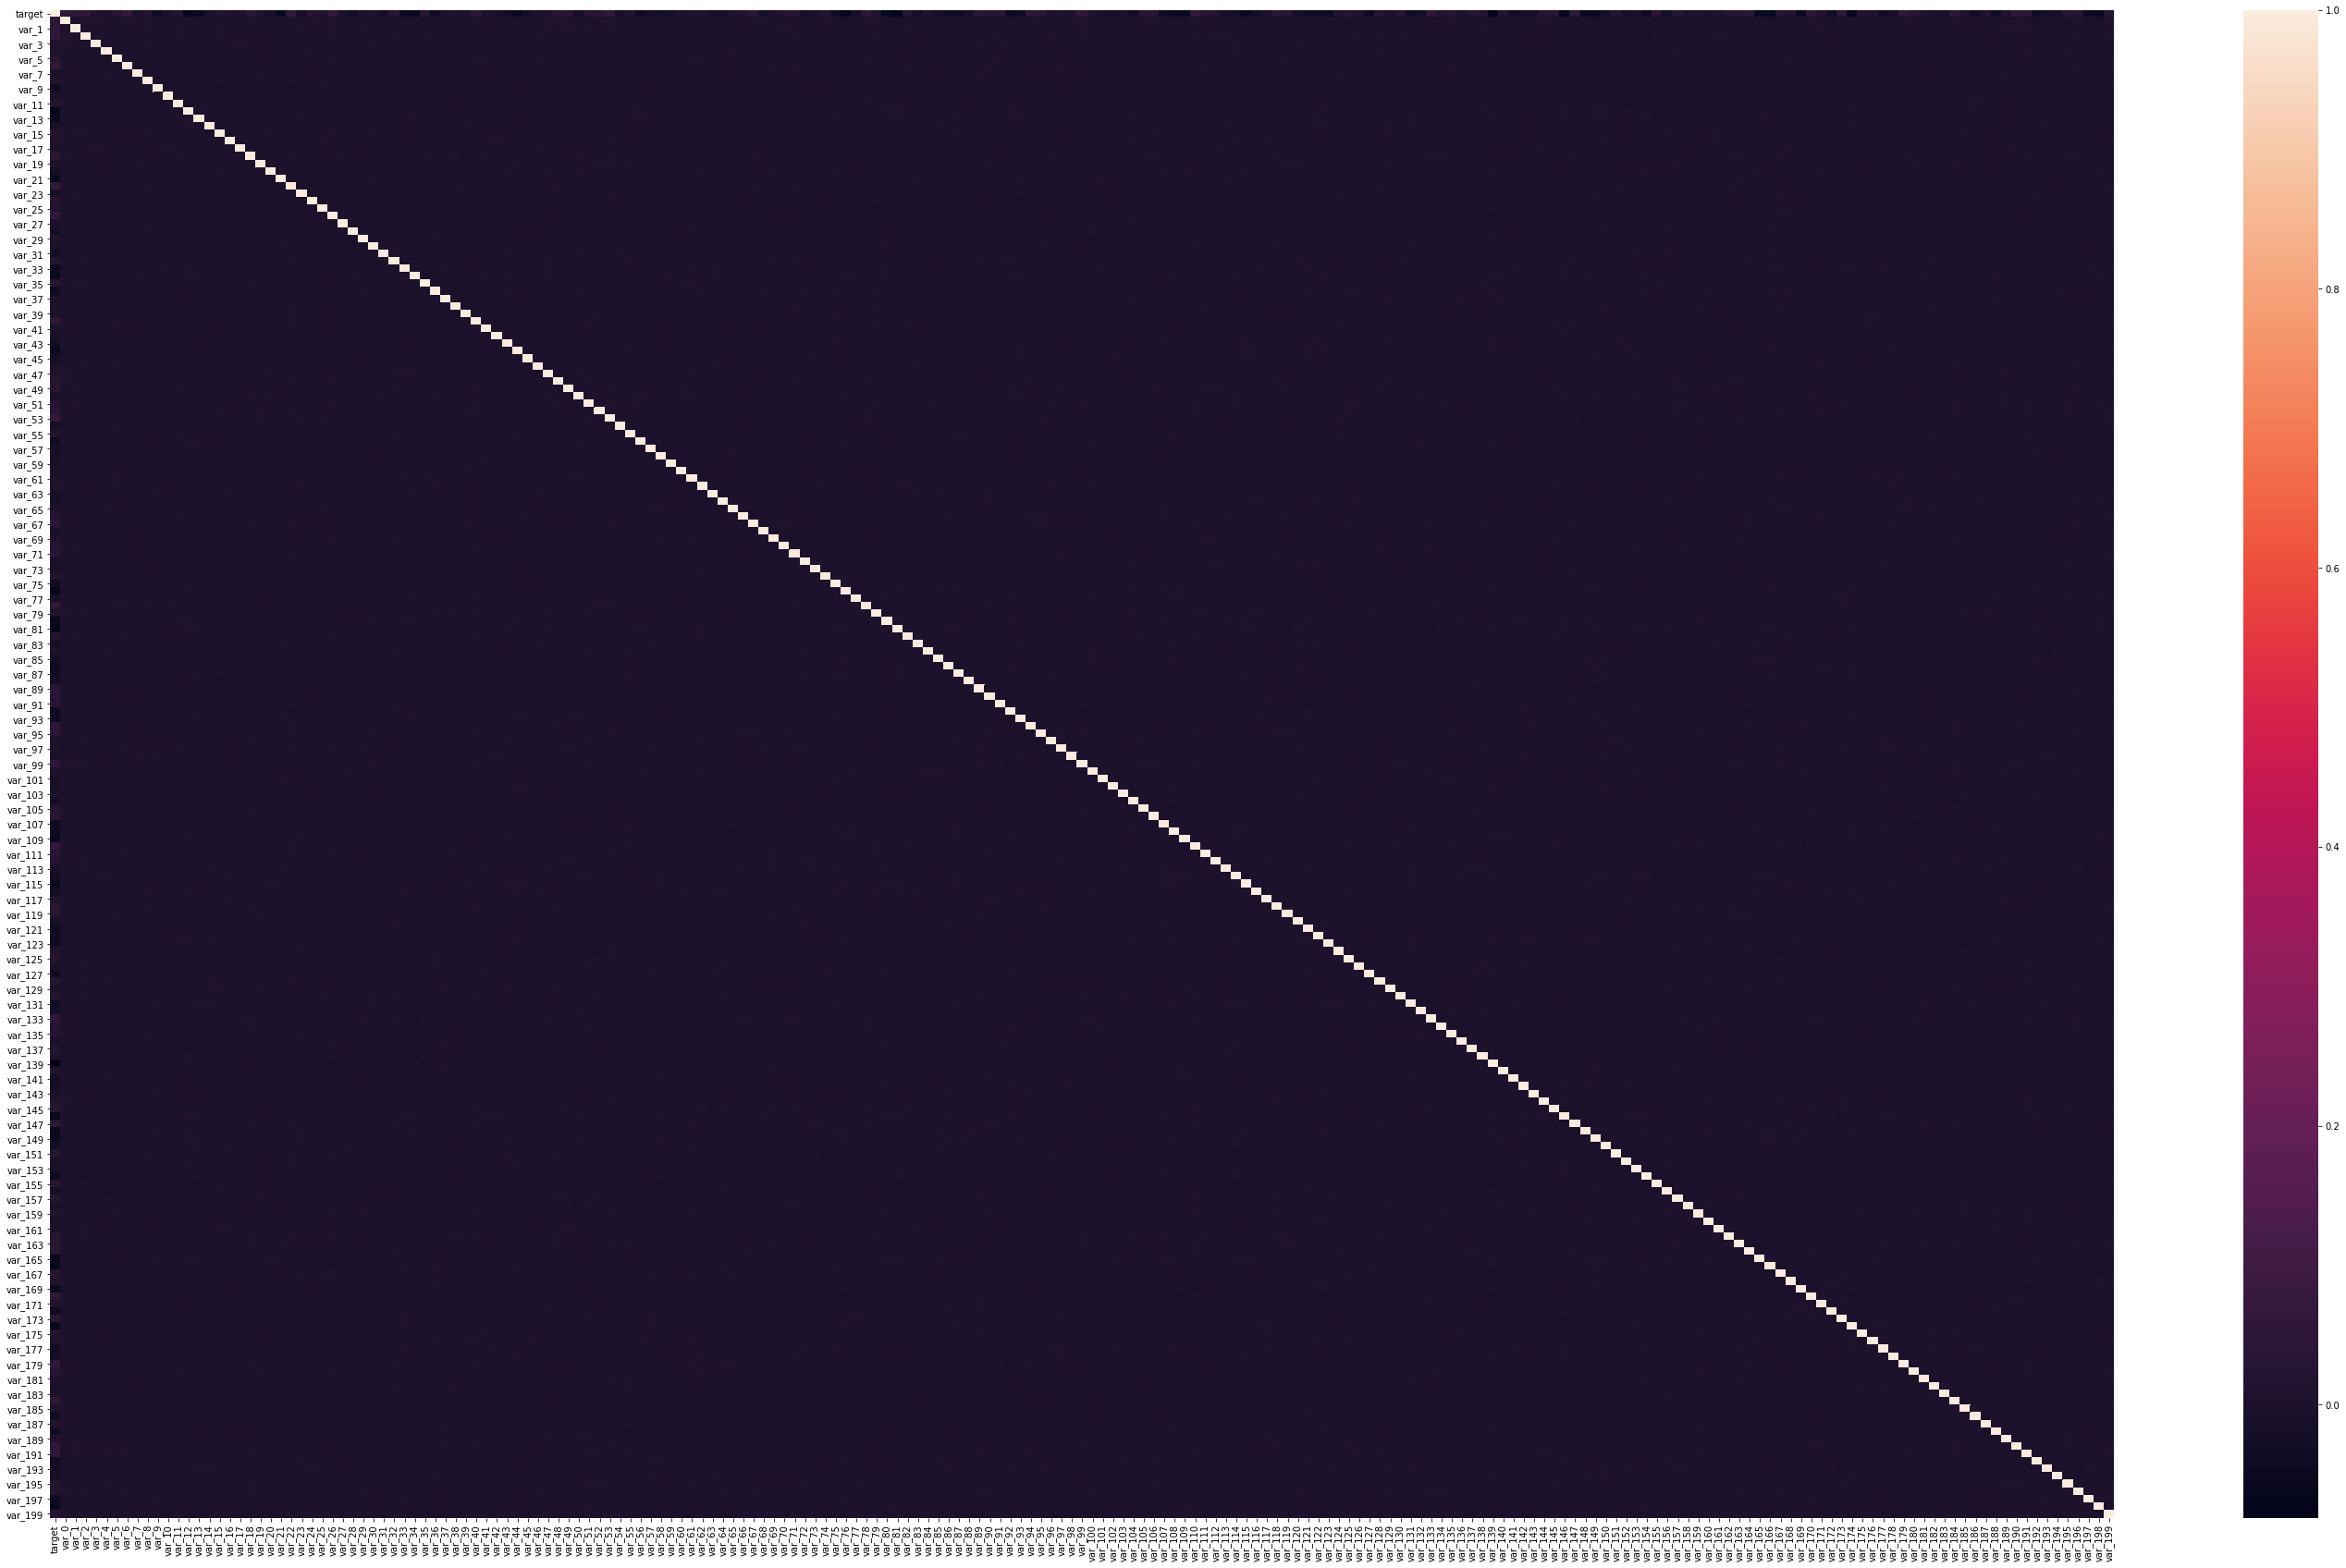

In [9]:
data_corr = data.corr()
f, ax = plt.subplots(1,1, figsize=(50,30))
sns.heatmap(data_corr, ax=ax)

# Split data

In [10]:
x_data, y_data = data.drop('target', axis=1), data.target

# scaling

In [11]:
# scaler = preprocessing.StandardScaler()
# x_scale = scaler.fit_transform(x_data)
# x_data = pd.DataFrame(x_scale, columns=x_data.columns, index=x_data.index)
x_data.describe()

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.679914      -1.627622      10.715192       6.796529   
std         3.040051       4.050044       2.640894       2.043319   
min         0.408400     -15.043400       2.117100      -0.040200   
25%         8.453850      -4.740025       8.722475       5.254075   
50%        10.524750      -1.608050      10.580000       6.825000   
75%        12.758200       1.358625      12.516700       8.324100   
max        20.315000      10.376800      19.353000      13.188300   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.078333      -5.065317       5.408949      16.545850   
std         1.623150       7.863267       0.866607       3.418076   
min         5.074800     -32.562600       2.347300       5.349700   
25%         9.883175     -11.200350       4.767700      13.943800   
50%        11.108250      -4.833150       5.385100      16.456800   
75%        12.261125       0.924800       6.003000      19.102900   
max        16.671400      17.251600       8.447700      27.691800   

               var_8          var_9      ...              var_190  \
count  200000.000000  200000.000000      ...        200000.000000   
mean        0.284162       7.567236      ...             3.234440   
std         3.332634       1.235070      ...             4.559922   
min       -10.505500       3.970500      ...           -14.093300   
25%        -2.317800       6.618800      ...            -0.058825   
50%         0.393700       7.629600      ...             3.203600   
75%         2.937900       8.584425      ...             6.406200   
max        10.151300      11.150600      ...            18.440900   

             var_191        var_192        var_193        var_194  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        7.438408       1.927839       3.331774      17.993784   
std         3.023272       1.478423       3.992030       3.135162   
min        -2.691700      -3.814500     -11.783400       8.694400   
25%         5.157400       0.889775       0.584600      15.629800   
50%         7.347750       1.901300       3.396350      17.957950   
75%         9.512525       2.949500       6.205800      20.396525   
max        16.716500       8.402400      18.281800      27.928800   

             var_195        var_196        var_197        var_198  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       -0.142088       2.303335       8.908158      15.870720   
std         1.429372       5.454369       0.921625       3.010945   
min        -5.261000     -14.209600       5.960600       6.299300   
25%        -1.170700      -1.946925       8.252800      13.829700   
50%        -0.172700       2.408900       8.888200      15.934050   
75%         0.829600       6.556725       9.593300      18.064725   
max         4.272900      18.321500      12.000400      26.079100   

             var_199  
count  200000.000000  
mean       -3.326537  
std        10.438015  
min       -38.852800  
25%       -11.208475  
50%        -2.819550  
75%         4.836800  
max        28.500700  

[8 rows x 200 columns]

# Data distribution

In [12]:
x_data.iloc[:,1].nunique()

108932

C:\Users\wogur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


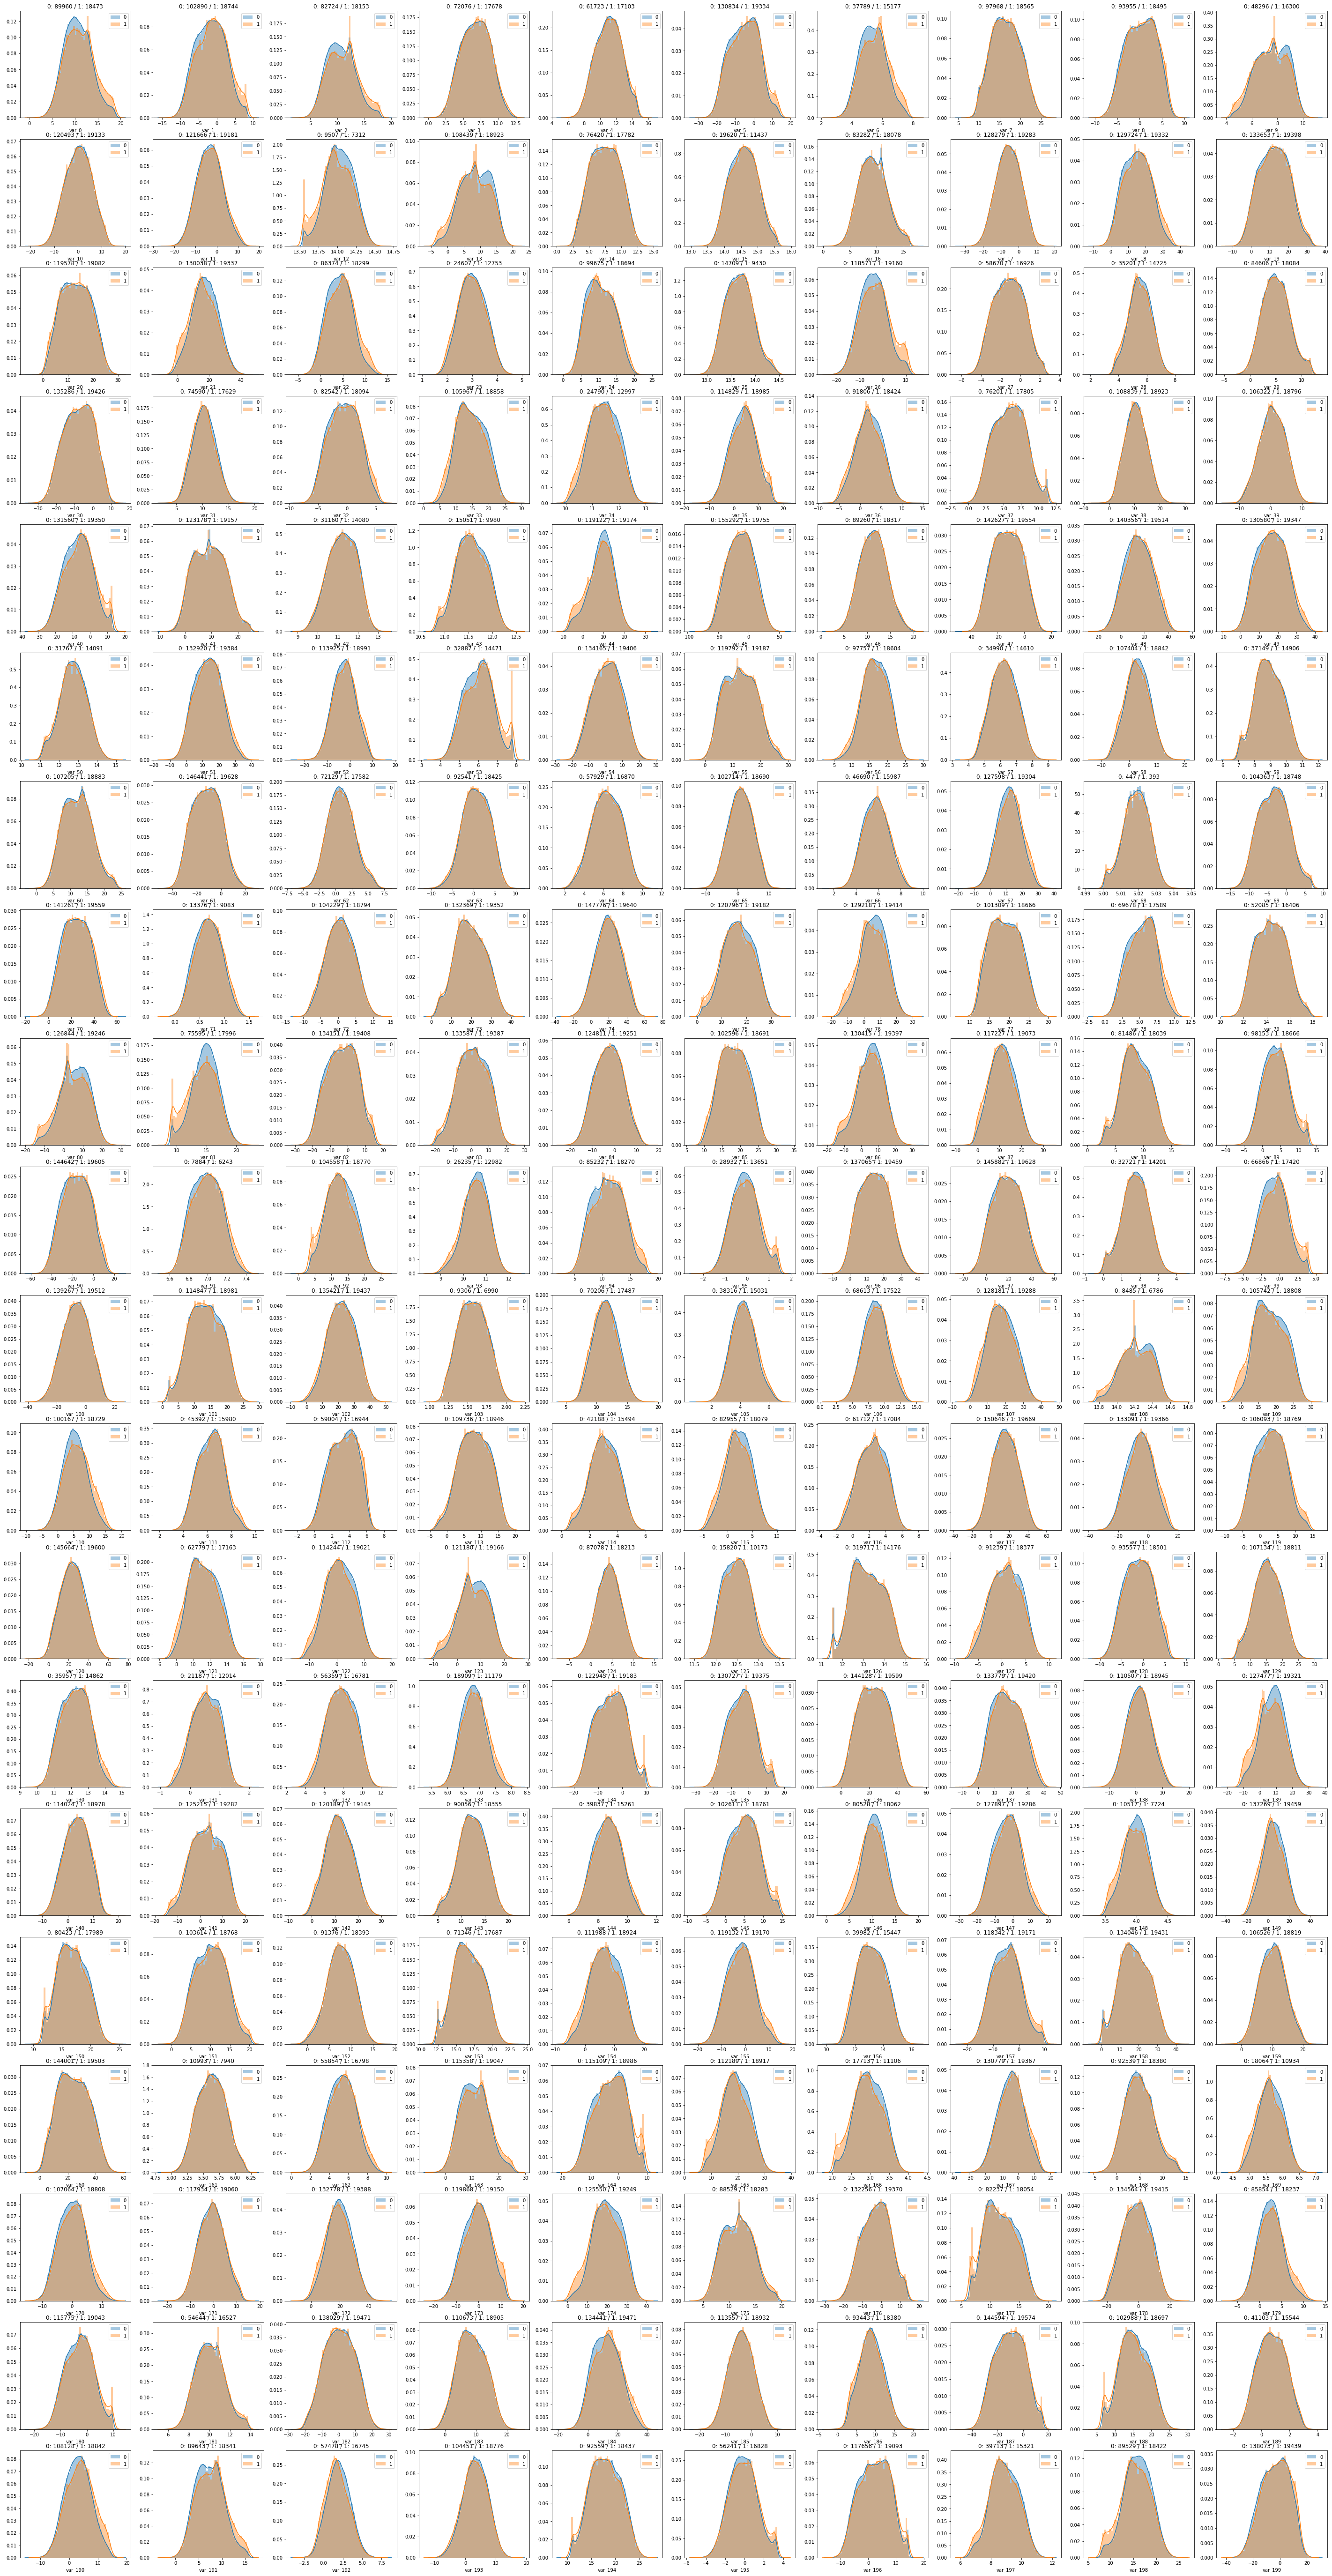

In [17]:
f, ax = plt.subplots(20,10, figsize=(50,100))
for i in range(10*20):
    sns.distplot(x_data[y_data==0].iloc[:,i], ax=ax[i//10, i%10], label='0')
    sns.distplot(x_data[y_data==1].iloc[:,i], ax=ax[i//10, i%10], label='1')
    ax[i//10, i%10].set_title('0: {} / 1: {}'.format(x_data[y_data==0].iloc[:,i].nunique(), x_data[y_data==1].iloc[:,i].nunique()))
    ax[i//10, i%10].legend(loc='upper right')

In [13]:
f_nunique = np.zeros(200)
for i in range(len(x_data.columns)):
    f_nunique[i] = x_data.iloc[:,i].nunique()

In [14]:
rank = np.zeros(200)
for i in range(len(x_data.columns)):
    rank[i] = np.where(f_nunique==np.sort(f_nunique)[i])[0]
rank = rank.astype(int)

In [15]:
x_data[x_data.duplicated()].shape

(0, 200)

C:\Users\wogur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


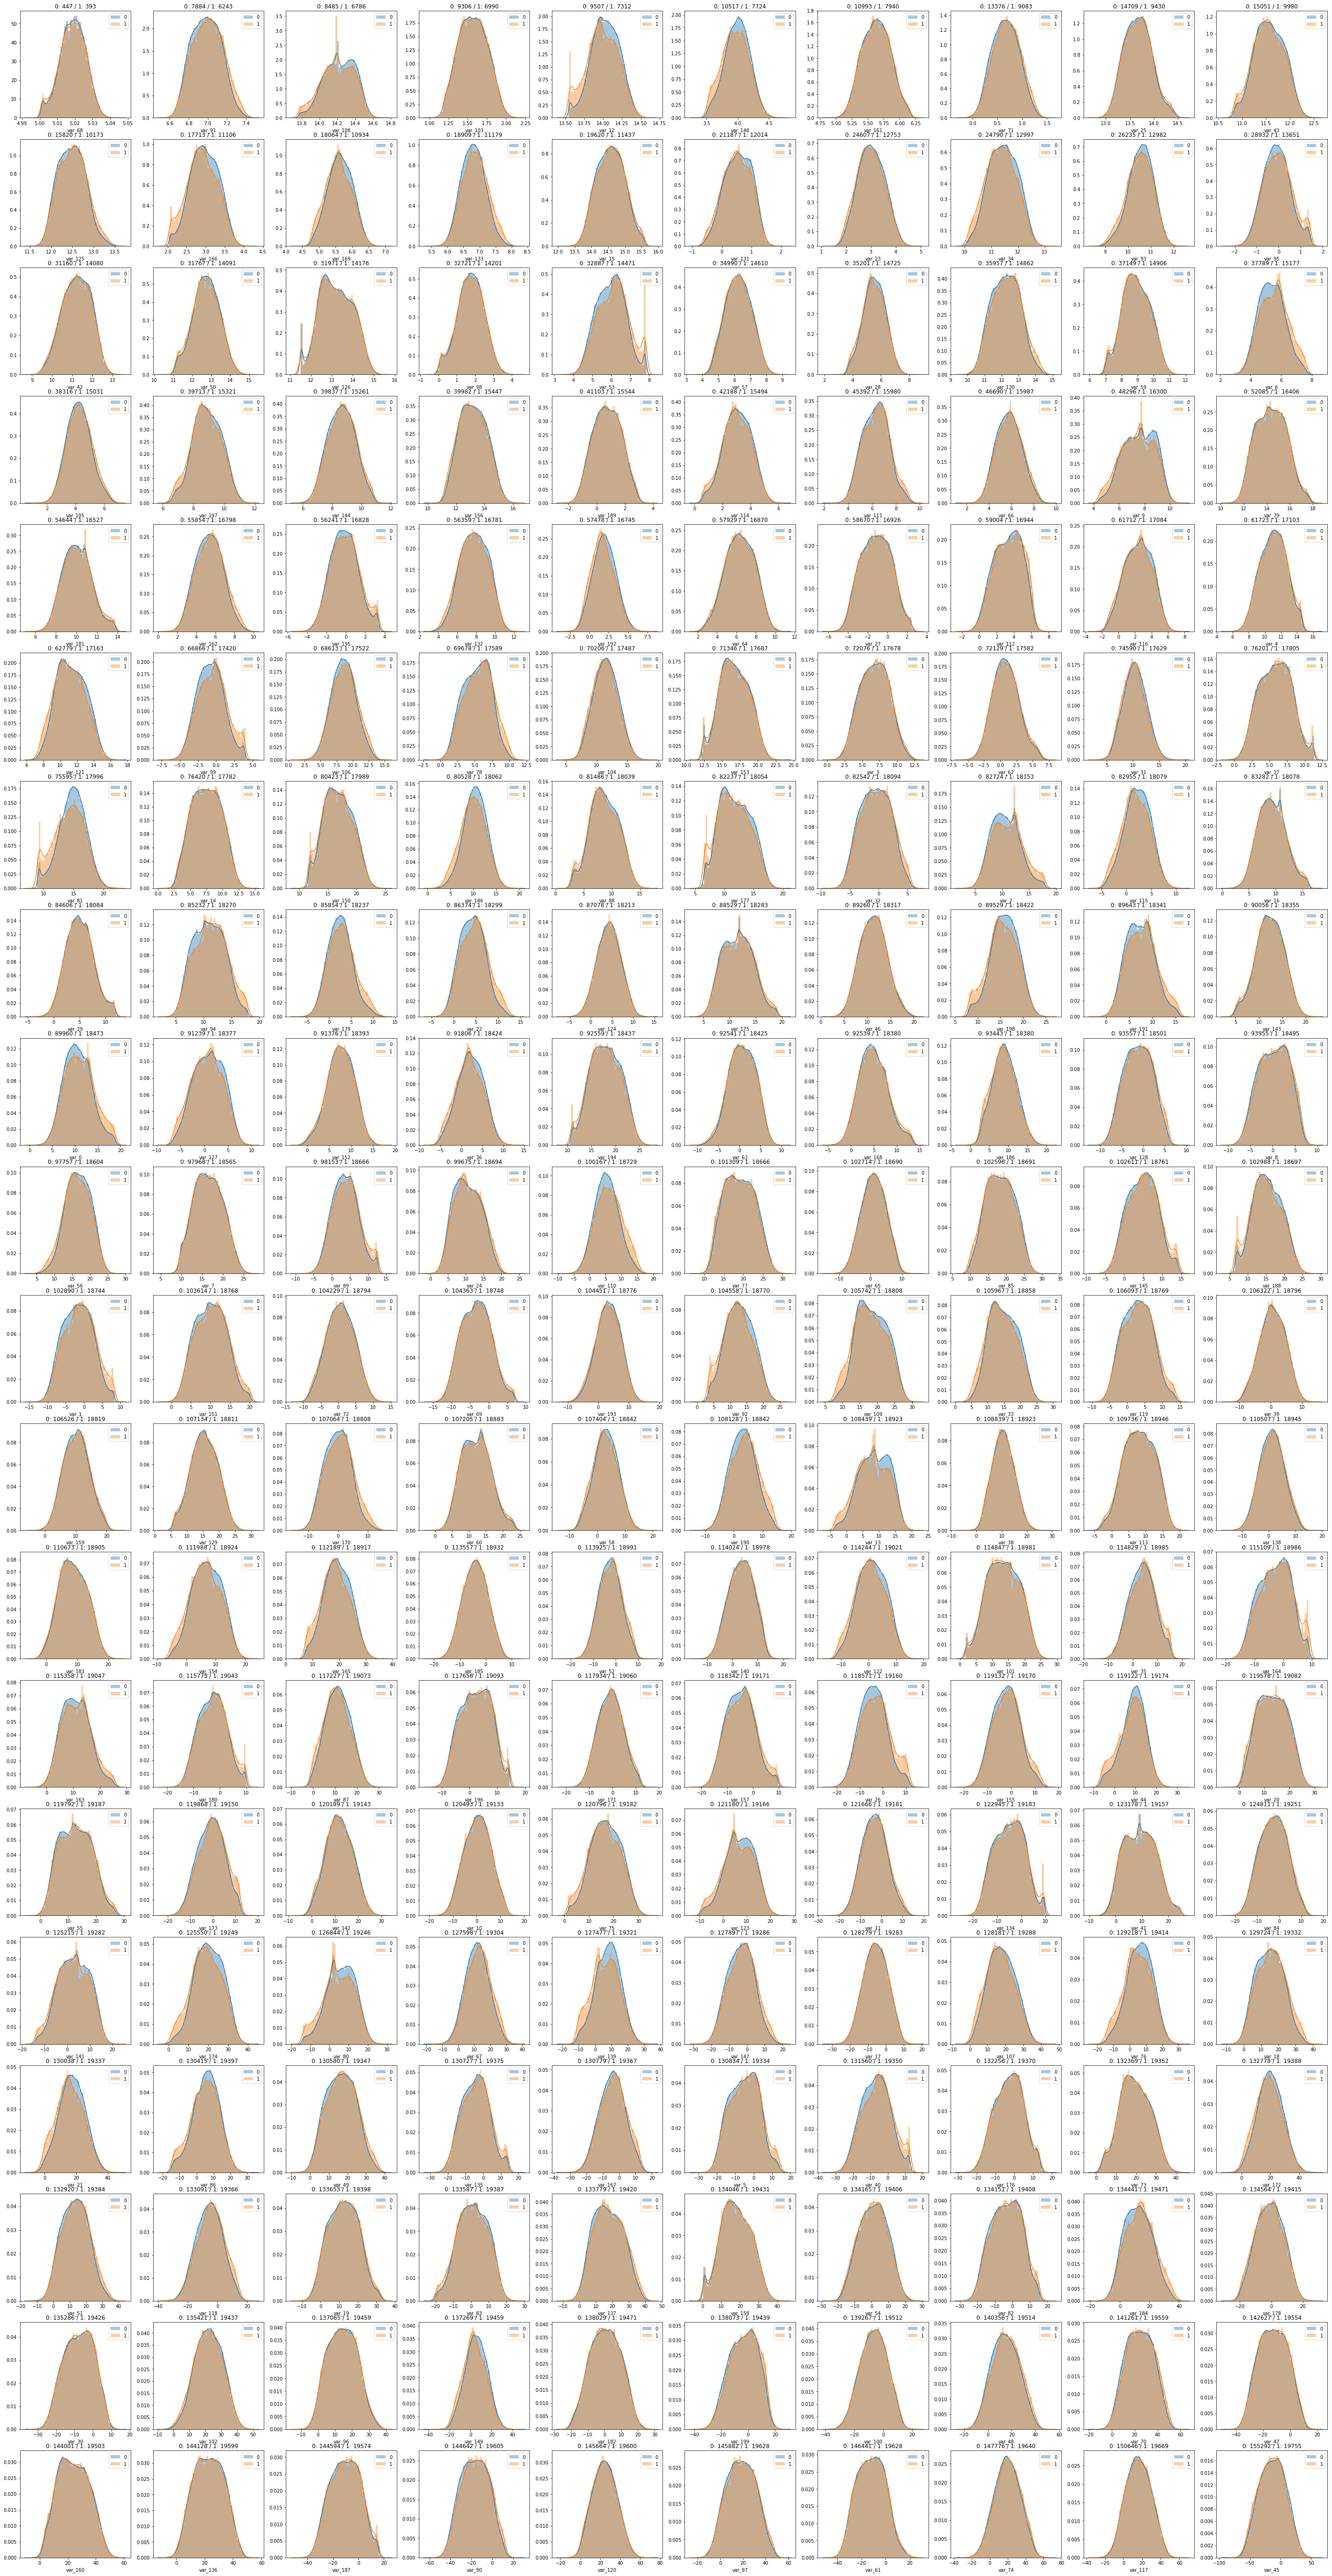

In [47]:
f, ax = plt.subplots(20,10, figsize=(50,100))
for i in range(10*20):
    sns.distplot(x_data[y_data==0].iloc[:,rank[i]], ax=ax[i//10, i%10], label='0')
    sns.distplot(x_data[y_data==1].iloc[:,rank[i]], ax=ax[i//10, i%10], label='1')
    ax[i//10, i%10].set_title('0: {} / 1: {}'.format(x_data[y_data==0].iloc[:,rank[i]].nunique(), x_data[y_data==1].iloc[:,rank[i]].nunique()))
    ax[i//10, i%10].legend(loc='upper right')

# PCA

In [24]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_data)

In [33]:
pca_df = pd.DataFrame(x_pca, columns=['PC1','PC2','PC3'], index=x_data.index)

In [61]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

trace1 = go.Scatter3d(
    x=pca_df[y_data==0].sample(n=18000).iloc[:,0],
    y=pca_df[y_data==0].sample(n=18000).iloc[:,1],
    z=pca_df[y_data==0].sample(n=18000).iloc[:,1],
    mode='markers',
    marker=dict(
        size=2,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

trace2 = go.Scatter3d(
    x=pca_df[y_data==1].sample(n=2000).iloc[:,0],
    y=pca_df[y_data==1].sample(n=2000).iloc[:,1],
    z=pca_df[y_data==1].sample(n=2000).iloc[:,2],
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=2,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~wogur379/0 or inside your plot.ly account where it is named 'simple-3d-scatter'


In [15]:
x_data.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

In [13]:
for c in x_data.columns:
    print(c,': ',x_data[c].value_counts().shape[0])

var_0 :  94672
var_1 :  108932
var_2 :  86555
var_3 :  74597
var_4 :  63515
var_5 :  141029
var_6 :  38599
var_7 :  103063
var_8 :  98617
var_9 :  49417
var_10 :  128764
var_11 :  130193
var_12 :  9561
var_13 :  115181
var_14 :  79122
var_15 :  19810
var_16 :  86918
var_17 :  137823
var_18 :  139515
var_19 :  144180
var_20 :  127764
var_21 :  140062
var_22 :  90660
var_23 :  24913
var_24 :  105101
var_25 :  14853
var_26 :  127089
var_27 :  60185
var_28 :  35859
var_29 :  88339
var_30 :  145977
var_31 :  77388
var_32 :  85964
var_33 :  112239
var_34 :  25164
var_35 :  122384
var_36 :  96404
var_37 :  79040
var_38 :  115366
var_39 :  112674
var_40 :  141878
var_41 :  131896
var_42 :  31592
var_43 :  15188
var_44 :  127702
var_45 :  169968
var_46 :  93450
var_47 :  154781
var_48 :  152039
var_49 :  140641
var_50 :  32308
var_51 :  143455
var_52 :  121313
var_53 :  33460
var_54 :  144776
var_55 :  128077
var_56 :  103045
var_57 :  35545
var_58 :  113907
var_59 :  37744
var_60 :  113763
var

In [19]:
x_data.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
ID_code                                                                       
train_0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266   
train_1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338   
train_2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155   
train_3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250   
train_4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514   

          var_8   var_9   ...     var_190  var_191  var_192  var_193  var_194  \
ID_code                   ...                                                   
train_0 -4.9200  5.7470   ...      4.4354   3.9642   3.1364   1.6910  18.5227   
train_1  3.1468  8.0851   ...      7.6421   7.7214   2.5837  10.9516  15.4305   
train_2 -4.9193  5.9525   ...      2.9057   9.7905   1.6704   1.6858  21.6042   
train_3 -5.8609  8.2450   ...      4.4666   4.7433   0.7178   1.4214  23.0347   
train_4  6.2654  7.6784   ...     -1.4905   9.5214  -0.1508   9.1942  13.2876   

         var_195  var_196  var_197  var_198  var_199  
ID_code                                               
train_0  -2.3978   7.8784   8.5635  12.7803  -1.0914  
train_1   2.0339   8.1267   8.7889  18.3560   1.9518  
train_2   3.1417  -6.5213   8.2675  14.7222   0.3965  
train_3  -1.2706  -2.9275  10.2922  17.9697  -8.9996  
train_4  -1.5121   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 200 columns]

In [20]:
scaler = preprocessing.StandardScaler()
x_scale = scaler.fit_transform(x_data)
x_data_s = pd.DataFrame(x_scale, columns=x_data.columns, index=x_data.index)
x_data_s.describe()

var_0         var_1         var_2         var_3         var_4  \
count  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05   
mean   6.984095e-16 -3.493761e-17 -6.816742e-16 -6.580014e-17 -6.352482e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -3.378739e+00 -3.312510e+00 -3.255758e+00 -3.345903e+00 -3.698703e+00   
25%   -7.322476e-01 -7.684882e-01 -7.545633e-01 -7.548787e-01 -7.363223e-01   
50%   -5.104015e-02  4.832475e-03 -5.119182e-02  1.393366e-02  1.843135e-02   
75%    6.836369e-01  7.373387e-01  6.821601e-01  7.475948e-01  7.287035e-01   
max    3.169391e+00  2.964030e+00  3.270797e+00  3.128139e+00  3.445820e+00   

              var_5         var_6         var_7         var_8         var_9  \
count  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05   
mean   1.478817e-17 -9.260245e-17  6.768006e-16 -3.457373e-18  1.417617e-15   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -3.496937e+00 -3.532923e+00 -3.275579e+00 -3.237586e+00 -2.912180e+00   
25%   -7.802162e-01 -7.399549e-01 -7.612636e-01 -7.807544e-01 -7.679231e-01   
50%    2.952565e-02 -2.751966e-02 -2.605270e-02  3.286843e-02  5.049414e-02   
75%    7.617868e-01  6.854925e-01  7.480983e-01  7.962906e-01  8.235900e-01   
max    2.838130e+00  3.506501e+00  3.260893e+00  2.960770e+00  2.901352e+00   

           ...            var_190       var_191       var_192       var_193  \
count      ...       2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05   
mean       ...      -1.794120e-18  2.345457e-16  1.215494e-16  1.252543e-16   
std        ...       1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min        ...      -3.800018e+00 -3.350719e+00 -3.884107e+00 -3.786347e+00   
25%        ...      -7.222214e-01 -7.544853e-01 -7.021442e-01 -6.881662e-01   
50%        ...      -6.763242e-03 -2.998690e-02 -1.795060e-02  1.617635e-02   
75%        ...       6.955751e-01  6.860521e-01  6.910499e-01  7.199428e-01   
max        ...       3.334816e+00  3.068899e+00  4.379381e+00  3.744977e+00   

            var_194       var_195       var_196       var_197       var_198  \
count  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05   
mean  -7.931561e-16  5.891176e-17  4.307943e-17 -7.464218e-16  1.394063e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -2.966165e+00 -3.581239e+00 -3.027477e+00 -3.198224e+00 -3.178883e+00   
25%   -7.540249e-01 -7.196264e-01 -7.792415e-01 -7.110907e-01 -6.778686e-01   
50%   -1.142980e-02 -2.141614e-02  1.935421e-02 -2.165493e-02  2.103323e-02   
75%    7.663868e-01  6.798025e-01  7.798153e-01  7.434083e-01  7.286782e-01   
max    3.168908e+00  3.088768e+00  2.936766e+00  3.355213e+00  3.390432e+00   

            var_199  
count  2.000000e+05  
mean   3.308326e-17  
std    1.000003e+00  
min   -3.403554e+00  
25%   -7.551204e-01  
50%    4.857132e-02  
75%    7.820795e-01  
max    3.049173e+00  

[8 rows x 200 columns]

# row ?? 

In [30]:
train_id_mean_std = pd.DataFrame({'mean':x_data.mean(axis=1), 'std':x_data.std(axis=1)})
test_id_mean_std = pd.DataFrame({'mean':test.mean(axis=1), 'std':test.std(axis=1)})

In [32]:
train_id_mean_std.describe()

mean            std
count  200000.000000  200000.000000
mean        6.767449       9.662541
std         0.401547       0.565214
min         4.963318       7.369270
25%         6.496104       9.273961
50%         6.767204       9.650706
75%         7.038124      10.035606
max         8.469586      12.454861

In [33]:
test_id_mean_std.describe()

mean            std
count  200000.000000  200000.000000
mean        6.769552       9.657404
std         0.401136       0.565163
min         4.894110       7.328641
25%         6.498039       9.268811
50%         6.768359       9.643002
75%         7.040416      10.031496
max         8.549888      12.179116

C:\Users\wogur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


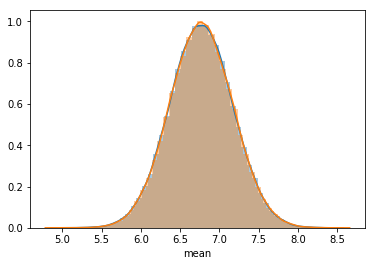

In [34]:
sns.distplot(train_id_mean_std['mean'], label='train')
sns.distplot(test_id_mean_std['mean'], label='test')

C:\Users\wogur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


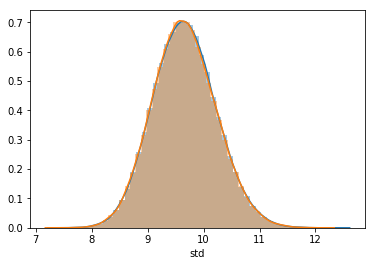

In [35]:
sns.distplot(train_id_mean_std['std'], label='train')
sns.distplot(test_id_mean_std['std'], label='test')

In [38]:
df_test = test.copy()
df_test = df_test.values

unique_samples = []
unique_count = np.zeros_like(df_test)
for feature in tqdm(range(df_test.shape[1])):
    _, index_, count_ = np.unique(df_test[:, feature], return_counts=True, return_index=True)
    unique_count[index_[count_ == 1], feature] += 1

# Samples which have unique values are real the others are fake
real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

print(len(real_samples_indexes))
print(len(synthetic_samples_indexes))

100%|█████████████████████████| 200/200 [03:07<00:00,  1.06it/s]


100000
100000


In [58]:
df_test_real = df_test[real_samples_indexes].copy()

generator_for_each_synthetic_sample = []
# Using 20,000 samples should be enough. 
# You can use all of the 100,000 and get the same results (but 5 times slower)
for cur_sample_index in tqdm(synthetic_samples_indexes[:20000]):
    cur_synthetic_sample = df_test[cur_sample_index]
    potential_generators = df_test_real == cur_synthetic_sample

    # A verified generator for a synthetic sample is achieved
    # only if the value of a feature appears only once in the
    # entire real samples set
    features_mask = np.sum(potential_generators, axis=0) == 1
    verified_generators_mask = np.any(potential_generators[:, features_mask], axis=1)
    verified_generators_for_sample = real_samples_indexes[np.argwhere(verified_generators_mask)[:, 0]]
    generator_for_each_synthetic_sample.append(set(verified_generators_for_sample))


  0%|                      | 5/20000 [00:09<10:47:26,  1.94s/it]

KeyboardInterrupt: 

In [ ]:
np.unique(x_data.values(), return_counts=True)

array([[  8.9255,  -6.7863,  11.9081, ...,   8.5635,  12.7803,  -1.0914],
       [ 11.5006,  -4.1473,  13.8588, ...,   8.7889,  18.356 ,   1.9518],
       [  8.6093,  -2.7457,  12.0805, ...,   8.2675,  14.7222,   0.3965],
       ...,
       [ 11.2232,  -5.0518,  10.5127, ...,   8.7155,  13.8329,   4.1995],
       [  9.7148,  -8.6098,  13.6104, ...,  10.0342,  15.5289, -13.9001],
       [ 10.8762,  -5.7105,  12.1183, ...,   8.1857,  12.1284,   0.1385]])

Exception ignored in: <bound method tqdm.__del__ of   3%|▋                   | 634/20000 [23:50<12:08:26,  2.26s/it]>
Traceback (most recent call last):
  File "C:\Users\wogur\Anaconda3\lib\site-packages\tqdm\_tqdm.py", line 885, in __del__
    self.close()
  File "C:\Users\wogur\Anaconda3\lib\site-packages\tqdm\_tqdm.py", line 1090, in close
    self._decr_instances(self)
  File "C:\Users\wogur\Anaconda3\lib\site-packages\tqdm\_tqdm.py", line 441, in _decr_instances
    cls._instances.remove(instance)
  File "C:\Users\wogur\Anaconda3\lib\_weakrefset.py", line 109, in remove
    self.data.remove(ref(item))
KeyError: <weakref at 0x000001B76C4E7AE8; to 'tqdm' at 0x000001B728FE1BE0>


In [39]:
real_samples_indexes.shape

(100000,)

In [47]:
index_.shape

(85933,)

In [49]:
count_.shape

(85933,)

In [54]:
np.sum(unique_count, axis=1).shape

(200000,)

In [56]:
np.unique(np.array([0,0,1,1,1,2,3,4,3,3,3,5,6]), return_counts=True, return_index=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([ 0,  2,  5,  6,  7, 11, 12], dtype=int64),
 array([2, 3, 1, 4, 1, 1, 1], dtype=int64))

In [55]:
np.argwhere(np.array([0,0,1,1,1,2,3,4,3,3,3,5,6]) > 1)

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]], dtype=int64)